<a href="https://colab.research.google.com/github/manal1407/Information-Retrieval-Tokenizer/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q otter-grader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 19.3 MB/s eta 0:00:00


In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !git clone https://github.com/porrashuang/CSE6740_CDA_HW1_Tests.git tests
else:
    print("Not running in Colab")

import otter
grader = otter.Notebook()


Cloning into 'tests'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 33 (delta 26), reused 12 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 15.24 KiB | 3.81 MiB/s, done.
Resolving deltas: 100% (26/26), done.


# Task 1: K-Means Clustering (20 pts)

## Goal
Implement a complete K-means clustering algorithm from scratch and test it on real data.

### Core Functions
1. **Distance calculation** - Compute Euclidean distance between points
2. **Find nearest centroid** - Determine which centroid is closest to a given point  
3. **Update assignments** - Assign all data points to their nearest centroids
4. **Update centroids** - Recalculate centroid positions based on assigned points
5. **Full K-means algorithm** - Combine everything with proper initialization and convergence

### Testing
Your implementation will be tested on the digits dataset to see how well it can identify different digit clusters compared to random guessing.

## Evaluation
- All functions work correctly and pass unit tests
- K-means achieves better clustering than random assignment on MNIST dataset



In [3]:
def distance_euclidean(a, b):
    """Compute the Euclidean distance between two points a and b.
    Input: a, b: numpy arrays of shape (d,)
    Output: Euclidean distance between a and b.
    """
    return np.sqrt(np.sum((a - b) ** 2))


In [4]:
grader.check("distance_euclidean")

distance_euclidean results: All test cases passed!

In [7]:
def find_closest_centroid(x, centroids):
    """Find the index of the closest centroid to point x.
    Input: x: numpy array of shape (d,)
           centroids: numpy array of shape (k, d) where each row is a centroid
    Output: index of the closest centroid to x.
    """
    distances = []
    for centroid in centroids:
      distances.append(distance_euclidean(x, centroid))
    return np.argmin(distances)

In [8]:
grader.check("find_closest_centroid")

find_closest_centroid results: All test cases passed!

In [9]:
def update_assignments(X, centroids):
       """Update the cluster assignments for each point in X.
       Input: X: numpy array of shape (n, d)
                 centroids: numpy array of shape (k, d)
       Output: numpy array of shape (n,) containing the index of the closest centroid for each point
       """
       assignments = []
       for x in X:
         assignments.append(find_closest_centroid(x, centroids))
       return np.array(assignments)




In [10]:
grader.check("update_assignments")

update_assignments results: All test cases passed!

In [32]:
def update_centroids(X, assignments):
    """
    Update centroids by computing the mean of all points assigned to each centroid.
    Input:
        X: numpy array of shape (n, d)
        assignments: numpy array of shape (n,) with cluster indices (0..k-1)

    ***** Note *******
    In order to make the result deterministic, initialize centroids with zeros.
    For centroids with no assignment, remove them.
    **** End Note ****

    Output:
        centroids: numpy array of shape (k, d)
    """
   # Determine k from the assignments
    k = len(np.unique(assignments))
    n_features = X.shape[1]

    new_centroids = []

    for i in range(k):
        # Find all points assigned to cluster i
        cluster_points = X[assignments == i]
        if len(cluster_points) > 0:
            # Calculate mean of assigned points
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids.append(new_centroid)
    return np.array(new_centroids)


In [33]:
grader.check("update_centroids")

update_centroids results: All test cases passed!


The evaluation process for K-means clustering on MNIST digits dataset follows these key steps:

### 1. Data Loading & Preprocessing
We will load the digits dataset (8x8 images of handwritten digits 0-9) from sklearn.datasets. We will split into training (70%) and test (30%) sets. We will use the training set to learn cluster centroids.

### 2. K-means Clustering
Run `myKmeans` on training data with k=10 clusters (one for each digit) and get the final centroids and assignments.

### 3. Cluster-to-Label Mapping
We use Hungarian algorithm https://en.wikipedia.org/wiki/Hungarian_algorithm to optimally map clusters to digit labels. In short, it tries to match the cluster assignments to the true labels by building a cost matrix based on how well each cluster represents each digit.

### 4. Test Set Prediction
We will assign test points to the nearest centroids using `update_assignments()`. Then, we will map the cluster assignments to digit labels using the mapping from step 3.

### 5. Performance Evaluation
The evaluation is done by calculating Adjusted Rand Index (ARI) between predicted and true labels and comparing against random baseline (random digit assignment). As long as the K-means ARI must exceed random ARI by 0.3, we consider it a success. The private test has the same structure but different random seed.

### 6. Visualization
At the end, we will display the 10 centroids as 8x8 images to see what each cluster learned

The evaluation shows that K-means should discover meaningful digit patterns and significantly outperform random guessing at clustering similar digits together.

In [51]:
def myKmeans(X, k, init_centroids=None, max_iters=100, epsilon=1e-4):
    """
    K-means clustering algorithm.

    Input:
        X (np.ndarray): data points, shape (n, d)
        k (int): number of clusters
        init_centroids (np.ndarray, optional): initial centroids, shape (k, d)
        max_iters (int): maximum number of iterations
        epsilon (float): convergence threshold

    Output:
        tuple: centroids (np.ndarray of shape (k, d)), assignments of each data point (np.ndarray of shape (n,))
    """
    if init_centroids is not None:
        centroids = init_centroids
    else:
        indices = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[indices].copy()

    # Main K-means loop
    for iteration in range(max_iters):
        # Step 1: Assign points to nearest centroids
        assignments = update_assignments(X, centroids)

        # Step 2: Update centroids
        new_centroids = update_centroids(X, assignments)

        # Check for convergence (centroids don't change significantly)
        if np.allclose(centroids, new_centroids, rtol=epsilon):
            #print(f"Converged after {iteration + 1} iterations")
            break

        centroids = new_centroids

    # Final assignments
    final_assignments = update_assignments(X, centroids)

    return centroids, final_assignments


In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
from scipy.optimize import linear_sum_assignment
def test_MNIST():
    # Load the digits dataset (acts as the MNIST dataset for demonstration)
    X, y = load_digits(return_X_y=True)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Number of clusters (10 digits)
    k = len(np.unique(y_train))


    centroids, assignments = myKmeans(X_train, k)
    # Map cluster indices to actual digit labels using the Hungarian algorithm
    train_pred_clusters = assignments
    cost_matrix = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            mask = train_pred_clusters == i
            cost_matrix[i, j] = -np.sum(y_train[mask] == j)

    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    cluster_to_label = {row: col for row, col in zip(row_ind, col_ind)}

    # Predict labels for the test data
    # Assign each test point to the nearest centroid
    test_pred_clusters = update_assignments(X_test, centroids)
    test_pred_labels = np.array([cluster_to_label[c] for c in test_pred_clusters])

    # Compute the Adjusted Rand Index (ARI) for the K-means predictions
    ari_score = adjusted_rand_score(y_test, test_pred_labels)

    # Baseline comparison: Random guess for each test label
    random_pred_labels = np.random.choice(np.unique(y_train), size=len(y_test))
    ari_score_random = adjusted_rand_score(y_test, random_pred_labels)

    return ari_score, ari_score_random, centroids, cluster_to_label
ari_score, ari_score_random, centroids, cluster_to_label = test_MNIST()

In [53]:
grader.check("kmeans")

kmeans results: All test cases passed!

<!-- BEGIN QUESTION -->



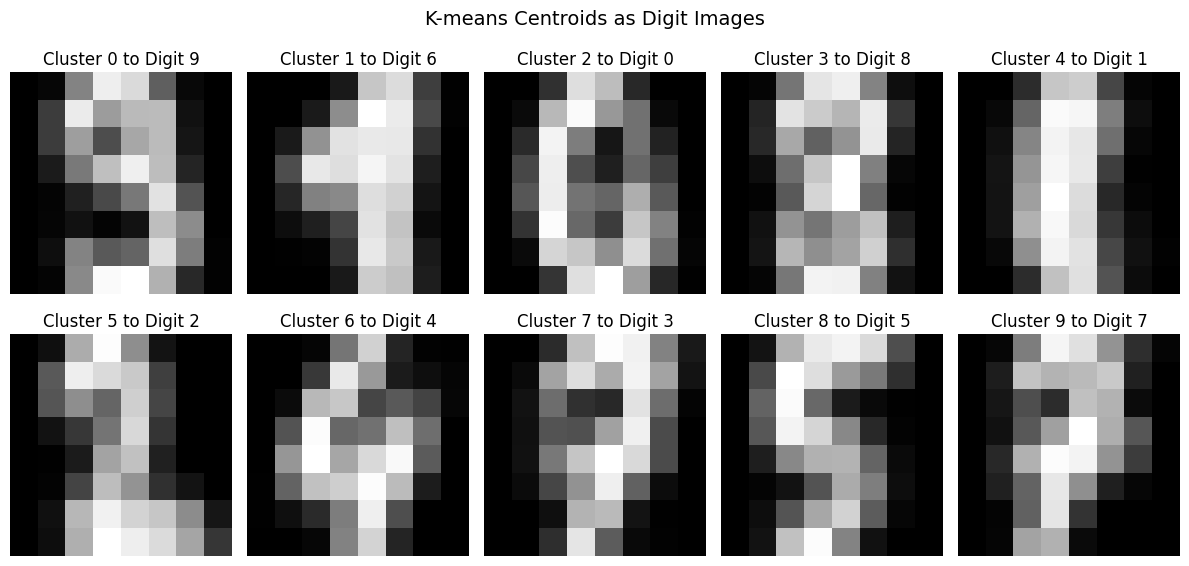

In [54]:
# Visualize the centroids as 8x8 digit images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    # Reshape centroid back to 8x8 image
    centroid_image = centroids[i].reshape(8, 8)
    axes[i].imshow(centroid_image, cmap='gray')
    # Show which digit this centroid represents
    assigned_digit = cluster_to_label.get(i, '?')
    axes[i].set_title(f'Cluster {i} to Digit {assigned_digit}')
    axes[i].axis('off')

plt.suptitle('K-means Centroids as Digit Images', fontsize=14)
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## What other ways we can initialize centroids? List at least 2 and their advantages/disadvantages. [1.5 pts]




_Type your answer here, replacing this text._

1.   Divide  data space into a grid and place centroids at evenly spaced grid points.
2.   Pick the first centroid randomly, then for each next centroid, choose points that are far away from already-chosen centroids.



<!-- END QUESTION -->

# Task 2: Three Coins Model (30 pts)

### Purpose
- Develop an intuitive understanding of the EM algorithm using a simple example.  
- Implement a basic EM algorithm to solve the three coins problem.

### Problem Statement
Consider three coins **A**, **B**, and **C**, with probabilities of landing heads denoted as $p_0$, $p_1$, and $p_2$, respectively.  

The process is as follows:
1. Flip coin **A**.  
   - If **A** shows heads, flip coin **B**.  
   - If **A** shows tails, flip coin **C**.  
2. Record the outcome of the second flip as $y_i$, where:  
   - $y_i = 1$ if the result is heads.  
   - $y_i = 0$ if the result is tails.  

Given a sequence of observed outcomes $y_0, y_1, \dots, y_n$, the task is to estimate the parameters $p_0$, $p_1$, and $p_2$ using the Expectation-Maximization (EM) algorithm.


<!-- BEGIN QUESTION -->

# Complete Data Log-Likelihood Function

Let's simplify the problem by assuming that the outcome of the first coin flip is known and denoted as $z_i$, where:

- $z_i = 1$ if coin $B$ was used,  
- $z_i = 0$ if coin $C$ was used.  

Given $z_i$ and the observed data $y_i$, can you define the log-likelihood function $L(z_i, y_i, p_0, p_1, p_2) = \log P(z_i, y_i \mid p_0, p_1, p_2)$ and implement it? [Writing is optional and won't be graded, but coding has points]

_Type your answer here, replacing this text._

<!-- END QUESTION -->



In [39]:
import math
def compute_log_likelihood(y_i, z_i, p_0, p_1, p_2):
    """
    Compute complete-data log-likelihood for one trial.

    Input:
        y_i (int): observed result of the second toss, 1=heads, 0=tails
        z_i (int): latent branch,
                   1 if coin A=H -> coin B,
                   0 if coin A=T -> coin C
        p_0 (float): P(H on coin A)
        p_1 (float): P(H on coin B)
        p_2 (float): P(H on coin C)

    Output:
        float: log P(y_i, z_i | parameters)
    """
    # tiny epsilon so we never take log(0)
    eps = 1e-12

    if z_i == 1:
        # went to coin B
        log_pA = math.log(max(p_0, eps))
        log_pY = y_i * math.log(max(p_1, eps)) + (1 - y_i) * math.log(max(1 - p_1, eps))
        return log_pA + log_pY
    else:
        # went to coin C
        log_pA = math.log(max(1 - p_0, eps))
        log_pY = y_i * math.log(max(p_2, eps)) + (1 - y_i) * math.log(max(1 - p_2, eps))
        return log_pA + log_pY


In [40]:
grader.check("complete-log-likelihood-coding")

complete-log-likelihood-coding results: All test cases passed!

<!-- BEGIN QUESTION -->

### Write the complete log-likelihood formula for all observations $y_0, y_1, \dots, y_n$ with corresponding latent variables $z_0, z_1, \dots, z_n$. [Optional, won't be graded]




_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->


Given the observations $Y = (y_0, y_1, \dots, y_n)$ and the latent variables $Z = (z_0, z_1, \dots, z_n)$, how can we maximize the log-likelihood function $L(Y, Z, p_0, p_1, p_2)$ with respect to the parameters $p_0$, $p_1$, and $p_2$? [Optional, won't be graded]

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Incomplete Data Log-Likelihood - Posterior of $z_i$
Now, let's assume that you do not know the result of the first coin $z_i$. Although you do not know the first coin result, you can still 'guess' by computing the posterior probability of $z_i$ given the observed data $y_i$ and the parameters $p_0, p_1, p_2$. From now on, we will use $\theta = (p_0, p_1, p_2)$ to denote the parameters of the model.

Let's note the latent variable as $z_i$ where $z_i = 1$ if the coin $B$ was used and $z_i = 0$ if the coin $C$ was used. We can estimate the latent variable $z_i$ given the observed data $y_i$.


 What is the posterior probability $P(z_i = 1 | y_i, \theta)$? Can you write it mathematically and implement it? [Writing is optional and won't be graded, but coding has points]


_Type your answer here, replacing this text._

<!-- END QUESTION -->



In [55]:
def compute_posterior(y_i, p_0, p_1, p_2):
    """
    Compute the posterior probability P(z_i = 1 | y_i, theta)
    Input: y_i (observation), p_0 (prior for coin A), p_1 (likelihood for coin B), p_2 (likelihood for coin C)
    Output: Posterior probability P(z_i = 1 | y_i, theta)
    """
    # Bernoulli likelihood helper:
    def bernoulli_p(y, p):
        return p if y == 1 else (1 - p)

    # Numerator: prior for B times likelihood of y under B
    num = p_0 * bernoulli_p(y_i, p_1)

    # Denominator: add the C branch
    den = num + (1 - p_0) * bernoulli_p(y_i, p_2)

    # small guard against divide-by-zero (optional)
    if den == 0:
        return 0.5  # neutral fallback
    return num / den

In [56]:
grader.check("posterior-of-z_i-coding")

posterior-of-z_i-coding results: All test cases passed!

What is the posterior probability $P(z_i = 0 | y_i, \theta)$?

In [57]:
def compute_posterior_zero(y_i, p_0, p_1, p_2):
    """
    Compute the posterior probability P(z_i = 0 | y_i, \theta)
    Input: y_i (observation), p_0 (prior for coin A), p_1 (likelihood for coin B), p_2 (likelihood for coin C)
    Output: Posterior probability P(z_i = 0 | y_i, \theta)
    """
    def bernoulli_p(y, p):
        return p if y == 1 else (1 - p)

    # numerator: prior for going to coin C times likelihood of y under C
    num = (1 - p_0) * bernoulli_p(y_i, p_2)

    # denominator: both branches
    den = p_0 * bernoulli_p(y_i, p_1) + (1 - p_0) * bernoulli_p(y_i, p_2)

    if den == 0:
        return 0.5
    return num / den

In [58]:
grader.check("posterior-of-z_i-coding-zero")

posterior-of-z_i-coding-zero results: All test cases passed!

Since we do not know $z$, but from Jensen Inequality we learned in class, we can lower bound the euqation. Thus we use the posterior probability of $z$ under the current parameters to estimate the log-likelihood function. This is called the Q-function in the EM algorithm. The Q-function is defined as follows:
```math
Q(\theta | \theta_k) = \mathbb{E}_{z \sim P(z | y, \theta_k)} [\log P(y, z | \theta)]
```
Note that $\theta_k$ is the current parameter and $\theta$ is the new parameter we want to maxmize the log-likelihood for.

### E-step
Calculate the log-likelihood function $Q(p_0, p_1, p_2 | p_0^{(t)}, p_1^{(t)}, p_2^{(t)})$ using the posterior probability of $z_i$ under the current parameters $p_0^{(t)}, p_1^{(t)}, p_2^{(t)}$. The return should be log-likelihood of $p_0, p_1, p_2$ given the current parameters $p_0^{(t)}, p_1^{(t)}, p_2^{(t)}$ and observations $Y = (y_0, y_1, ..., y_n)$.

In [59]:
import math

def _bern_lik_log(y, p, eps=1e-12):
    # log Bernoulli likelihood: y*log p + (1-y)*log(1-p)
    p = min(max(p, eps), 1 - eps)  # clamp away from 0/1 for stability
    return y * math.log(p) + (1 - y) * math.log(1 - p)

def _posterior_B(y, p0_t, p1_t, p2_t, eps=1e-12):
    # gamma_i = P(z_i=1 | y_i, theta_t) using Bayes rule
    def bern(y, p): return p if y == 1 else (1 - p)
    num = p0_t * bern(y, p1_t)
    den = num + (1 - p0_t) * bern(y, p2_t)
    if den <= eps:   # safety
        return 0.5
    return num / den

def Q_function(Y, p_0, p_1, p_2, p_0_t, p_1_t, p_2_t):
    """
    Compute the Q-function for the EM algorithm.

    Input:
        Y (list of int): observed results of the second toss, 1=heads, 0=tails
        p_0 (float): current estimate of P(H on coin A)
        p_1 (float): current estimate of P(H on coin B)
        p_2 (float): current estimate of P(H on coin C)
        p_0_t (float): previous estimate of P(H on coin A)
        p_1_t (float): previous estimate of P(H on coin B)
        p_2_t (float): previous estimate of P(H on coin C)

    Output:
        float: Q(p_0, p_1, p_2 | p_0_t, p_1_t, p_2_t)
    """
    total = 0.0
    for y in Y:
        gamma = _posterior_B(y, p_0_t, p_1_t, p_2_t)  # responsibility for branch B
        # contribution if branch B (z=1)
        total += gamma * (math.log(max(p_0, 1e-12)) + _bern_lik_log(y, p_1))
        # contribution if branch C (z=0)
        total += (1 - gamma) * (math.log(max(1 - p_0, 1e-12)) + _bern_lik_log(y, p_2))
    return total


In [60]:
grader.check("q-function")

q-function results: All test cases passed!

# M-Step
Maximize the Q-function $Q(p_0, p_1, p_2 | p_0^{(t)}, p_1^{(t)}, p_2^{(t)})$ with respect to the parameters $p_0$, $p_1$, and $p_2$. The return should be the new parameters $p_0^{(t+1)}$, $p_1^{(t+1)}$, and $p_2^{(t+1)}$ that maximize the Q-function.

In [61]:
import random
import math
# E-step helper from before
def compute_posterior(y_i, p_0, p_1, p_2):
    def bernoulli_p(y, p): return p if y == 1 else (1 - p)
    num = p_0 * bernoulli_p(y_i, p_1)
    den = num + (1 - p_0) * bernoulli_p(y_i, p_2)
    if den == 0:
        return 0.5
    return num / den  # gamma_i = P(z_i=1 | y_i, theta)

# --------- M-step (one update given current params) ----------
def update_parameters(Y, p_0, p_1, p_2):
    """
    Update the parameters of the model using the given data.
    Input: Y (list of observed data), p_0 (prior for coin A), p_1 (likelihood for coin B), p_2 (likelihood for coin C)
    Output: Updated parameters (p_0_new, p_1_new, p_2_new)
    """
    n = len(Y)
    eps = 1e-12

    gammas = [compute_posterior(y, p_0, p_1, p_2) for y in Y]

    sum_gamma = sum(gammas)
    sum_gamma_y = sum(g * y for g, y in zip(gammas, Y))
    sum_1mgamma = n - sum_gamma
    sum_1mgamma_y = sum((1 - g) * y for g, y in zip(gammas, Y))

    # M-step updates (clamp slightly away from 0/1 for stability)
    p0_new = min(max(sum_gamma / max(n, 1), eps), 1 - eps)
    p1_new = min(max(sum_gamma_y / max(sum_gamma, eps), eps), 1 - eps)
    p2_new = min(max(sum_1mgamma_y / max(sum_1mgamma, eps), eps), 1 - eps)

    return p0_new, p1_new, p2_new

In [65]:
import random
def estimate_parameters(Y, tol=1e-6, max_iter=1000):
    """
    Iterate until convergence
    Input: Y (list of observed data), tol (tolerance for convergence), max_iter (maximum number of iterations)
    Output: Estimated parameters (p_0, p_1, p_2)
    """
    p_0, p_1, p_2 = random.random(), random.random(), random.random()

    for _ in range(max_iter):
        p0_new, p1_new, p2_new = update_parameters(Y, p_0, p_1, p_2)

        # check convergence (max parameter change)
        delta = max(abs(p0_new - p_0), abs(p1_new - p_1), abs(p2_new - p_2))
        p_0, p_1, p_2 = p0_new, p1_new, p2_new
        if delta < tol:
            break

    return p_0, p_1, p_2


In [66]:
def generate_test(p_0, p_1, p_2, n=100):
    """
    Generate a test dataset based on the given parameters.

    Input:
        p_0 (float): P(H on coin A)
        p_1 (float): P(H on coin B)
        p_2 (float): P(H on coin C)
        n (int): number of trials

    Output:
        list of int: generated observed results of the second toss
    """
    Y = []
    for _ in range(n):
        z_i = 1 if random.random() < p_0 else 0
        y_i = 1 if random.random() < (p_1 if z_i == 1 else p_2) else 0
        Y.append(y_i)
    return Y
p_0, p_1, p_2 = 0.5, 0.7, 0.4
Y_0 = generate_test(p_0, p_1, p_2, n=1000)
p_estimated_0, p_estimated_1, p_estimated_2 = estimate_parameters(Y_0)
print(f"True parameters: p_0={p_0}, p_1={p_1}, p_2={p_2}")
print(f"Estimated parameters: p_0={p_estimated_0:.4f}, p_1={p_estimated_1:.4f}, p_2={p_estimated_2:.4f}")
print("Is it a good estimation?")

True parameters: p_0=0.5, p_1=0.7, p_2=0.4
Estimated parameters: p_0=0.4650, p_1=0.8655, p_2=0.3094
Is it a good estimation?


In [67]:
grader.check("m-step")

m-step results: All test cases passed!

<!-- BEGIN QUESTION -->

# Modified Problem: 5 Flips Per Trial

In the modified version:
1. Flip coin A once
2. If A shows heads -> flip coin B **5 times**
3. If A shows tails -> flip coin C **5 times**
4. Record all 5 outcomes as a sequence: e.g., `[1, 0, 1, 1, 0]`

Now each observation `y_i` is a list of 5 outcomes instead of a single outcome. We again simply and assume we now latent variables `z_i` for each sequence of flips.
What is the complete data log-likelihood for a sequence of flips with parameter $\theta$? [Writing is optional and won't be graded, but coding has points]


_Type your answer here, replacing this text._

<!-- END QUESTION -->



In [68]:
def compute_log_likelihood_sequence(y_sequence, z_i, p_0, p_1, p_2):
    """
    Compute complete-data log-likelihood for a sequence of flips.

    Input:
        y_sequence (list): sequence of flip results, e.g., [1, 0, 1, 1, 0]
        z_i (int): latent branch, 1 if coin B, 0 if coin C
        p_0 (float): P(H on coin A)
        p_1 (float): P(H on coin B)
        p_2 (float): P(H on coin C)

    Output:
        float: log P(y_sequence, z_i | parameters)
    """
    eps = 1e-12  # avoid log(0)
    m = sum(int(y) for y in y_sequence)
    T = len(y_sequence)

    if z_i == 1:  # branch B
        return (math.log(max(p_0, eps)) +
                m * math.log(max(p_1, eps)) +
                (T - m) * math.log(max(1 - p_1, eps)))
    else:         # branch C
        return (math.log(max(1 - p_0, eps)) +
                m * math.log(max(p_2, eps)) +
                (T - m) * math.log(max(1 - p_2, eps)))

In [69]:
grader.check("log-likelihood-sequence")

log-likelihood-sequence results: All test cases passed!

#

## Incomplete Data Log-Likelihood - Posterior of $z_i$
Again, let's assume that you do not know the result of the first coin $z_i$.
 What is the posterior probability $P(z_i = 1 | y_i, \theta)$? Can you write it mathematically and implement it? [Writing is optional and won't be graded, but coding has points]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->



In [70]:
import math

def _counts(y_sequence):
    m = sum(int(y) for y in y_sequence)  # heads count
    T = len(y_sequence)
    return m, T

def compute_posterior_sequence(y_sequence, p_0, p_1, p_2):
    """
    Compute P(z_i = 1 | y_sequence) for a sequence of flips.

    Input:
        y_sequence (list): sequence of flip results
        p_0, p_1, p_2: current parameter estimates

    Output:
        float: P(z_i = 1 | y_sequence)
    """
    eps = 1e-12
    m, T = _counts(y_sequence)

    # work in log-space for stability
    log_LB = (math.log(max(p_0, eps)) +
              m * math.log(max(p_1, eps)) +
              (T - m) * math.log(max(1 - p_1, eps)))
    log_LC = (math.log(max(1 - p_0, eps)) +
              m * math.log(max(p_2, eps)) +
              (T - m) * math.log(max(1 - p_2, eps)))

    # softmax for two numbers
    maxlog = max(log_LB, log_LC)
    LB = math.exp(log_LB - maxlog)
    LC = math.exp(log_LC - maxlog)
    return LB / (LB + LC)

def compute_posterior_zero_sequence(y_sequence, p_0, p_1, p_2):
    """
    Compute P(z_i = 0 | y_sequence) for a sequence of flips.
    """
    # complement or compute directly—both are fine
    return 1.0 - compute_posterior_sequence(y_sequence, p_0, p_1, p_2)

In [71]:
grader.check("posterior-sequence-coding")

posterior-sequence-coding results: All test cases passed!

### E-step
Calculate the log-likelihood function but this time Y is a list of sequences, $Y = [[y_{0,0}, y_{0,1}, \ldots, y_{0,T_0}], [y_{1,0}, y_{1,1}, \ldots, y_{1,T_1}], \ldots, [y_{N,0}, y_{N,1}, \ldots, y_{N,T_N}]]$. The return should be log-likelihood of $p_0, p_1, p_2$ given the current parameters $p_0^{(t)}, p_1^{(t)}, p_2^{(t)}$ and observations $Y = (y_0, y_1, ..., y_n)$.

In [72]:
import math
def Q_function_sequence(Y_sequences, p_0, p_1, p_2, p_0_t, p_1_t, p_2_t):
    """
    Compute the Q-function for sequences.

    Input:
        Y_sequences (list of lists): Each element is a sequence of 5 flips
        p_0, p_1, p_2: current parameters to evaluate
        p_0_t, p_1_t, p_2_t: previous iteration parameters for posterior computation

    Output:
        float: Q-function value
    """
    eps = 1e-12

    def posterior_B(yseq):
        # gamma = P(z=1 | yseq, theta_t) computed in log-space
        m = sum(int(y) for y in yseq)
        T = len(yseq)

        log_LB = (math.log(max(p_0_t, eps)) +
                  m * math.log(max(p_1_t, eps)) +
                  (T - m) * math.log(max(1 - p_1_t, eps)))
        log_LC = (math.log(max(1 - p_0_t, eps)) +
                  m * math.log(max(p_2_t, eps)) +
                  (T - m) * math.log(max(1 - p_2_t, eps)))

        mx = max(log_LB, log_LC)
        LB = math.exp(log_LB - mx)
        LC = math.exp(log_LC - mx)
        return LB / (LB + LC)

    total = 0.0
    for yseq in Y_sequences:
        m = sum(int(y) for y in yseq)
        T = len(yseq)
        gamma = posterior_B(yseq)  # responsibility for branch B

        # expected complete-data log-likelihood terms
        term_B = (math.log(max(p_0, eps)) +
                  m * math.log(max(p_1, eps)) +
                  (T - m) * math.log(max(1 - p_1, eps)))
        term_C = (math.log(max(1 - p_0, eps)) +
                  m * math.log(max(p_2, eps)) +
                  (T - m) * math.log(max(1 - p_2, eps)))

        total += gamma * term_B + (1 - gamma) * term_C

    return total

In [73]:
grader.check("q-function-sequence")

q-function-sequence results: All test cases passed!

# M-Step
Similarly, maximize the Q-function for sequences, $Q(p_0, p_1, p_2 | p_0^{(t)}, p_1^{(t)}, p_2^{(t)})$, with respect to the parameters $p_0$, $p_1$, and $p_2$. The return should be the new parameters $p_0^{(t+1)}$, $p_1^{(t+1)}$, and $p_2^{(t+1)}$ that maximize the Q-function.

In [75]:
import math, random

# ---- helpers ----
def _counts(yseq):
    m = sum(int(y) for y in yseq)   # #heads
    T = len(yseq)                   # flips in this seq
    return m, T

def _posterior_B_seq(yseq, p0, p1, p2, eps=1e-12):
    """gamma = P(z=1 | yseq, theta) in log-space."""
    m, T = _counts(yseq)
    log_LB = (math.log(max(p0, eps)) +
              m*math.log(max(p1, eps)) +
              (T-m)*math.log(max(1-p1, eps)))
    log_LC = (math.log(max(1-p0, eps)) +
              m*math.log(max(p2, eps)) +
              (T-m)*math.log(max(1-p2, eps)))
    mx = max(log_LB, log_LC)
    LB = math.exp(log_LB - mx)
    LC = math.exp(log_LC - mx)
    return LB / (LB + LC)

def _obs_loglik_sequences(Y_sequences, p0, p1, p2, eps=1e-12):
    """Observed-data log-likelihood for mixture (sum over sequences)."""
    total = 0.0
    for yseq in Y_sequences:
        m, T = _counts(yseq)
        # log( p0 * p1^m (1-p1)^(T-m) + (1-p0) * p2^m (1-p2)^(T-m) )
        a = (math.log(max(p0, eps)) +
             m*math.log(max(p1, eps)) +
             (T-m)*math.log(max(1-p1, eps)))
        b = (math.log(max(1-p0, eps)) +
             m*math.log(max(p2, eps)) +
             (T-m)*math.log(max(1-p2, eps)))
        mx = max(a, b)
        total += mx + math.log(math.exp(a-mx) + math.exp(b-mx))
    return total

def update_parameters_sequence(Y_sequences, p_0, p_1, p_2):
    """
    M-step: Update parameters for sequence data.

    Input:
        Y_sequences (list of lists): Each element is a sequence of 5 flips
        p_0, p_1, p_2: current parameter estimates

    Output:
        tuple: (p_0_new, p_1_new, p_2_new)
    """
    eps = 1e-12
    sum_g = sum_gy = sum_gT = 0.0
    sum_1g = sum_1gy = sum_1gT = 0.0

    for yseq in Y_sequences:
        m, T = _counts(yseq)
        g = _posterior_B_seq(yseq, p_0, p_1, p_2)  # gamma_i

        sum_g   += g
        sum_gy  += g * m
        sum_gT  += g * T

        one_g   = 1.0 - g
        sum_1g  += one_g
        sum_1gy += one_g * m
        sum_1gT += one_g * T

    # closed-form M-step with clamping for stability
    p0_new = min(max(sum_g / max(len(Y_sequences), 1), eps), 1 - eps)
    p1_new = min(max(sum_gy / max(sum_gT, eps), eps), 1 - eps)
    p2_new = min(max(sum_1gy / max(sum_1gT, eps), eps), 1 - eps)
    return p0_new, p1_new, p2_new

In [76]:
grader.check("update-parameters")

update-parameters results: All test cases passed!

In [77]:
def estimate_parameters_sequence(Y_sequences, tol=1e-6, max_iter=1000):
    """
    Iterate until convergence
    Input: Y (list of observed data), tol (tolerance for convergence), max_iter (maximum number of iterations)
    Output: Estimated parameters (p_0, p_1, p_2)
    """
    # random initialization
    p_0, p_1, p_2 = random.random(), random.random(), random.random()

    for _ in range(max_iter):
        # one M-step update
        p0_new, p1_new, p2_new = update_parameters_sequence(Y_sequences, p_0, p_1, p_2)

        # check convergence
        delta = max(abs(p0_new - p_0), abs(p1_new - p_1), abs(p2_new - p_2))
        p_0, p_1, p_2 = p0_new, p1_new, p2_new
        if delta < tol:
            break

    return p_0, p_1, p_2



In [78]:
def generate_test_sequence(p_0, p_1, p_2, n=100, k=5):
    """
    Generate test dataset with sequences.

    Input:
        p_0, p_1, p_2: true parameters
        n: number of trials
        k: number of flips per trial (5 in our case)

    Output:
        list of lists: each inner list is a sequence of k flips
    """
    Y_sequences = []
    for _ in range(n):
        # Flip coin A
        z_i = 1 if random.random() < p_0 else 0

        # Flip the selected coin k times
        coin_prob = p_1 if z_i == 1 else p_2
        sequence = [1 if random.random() < coin_prob else 0 for _ in range(k)]
        Y_sequences.append(sequence)

    return Y_sequences

# Example usage:
print("Testing the modified algorithm with 5 flips per trial:")
p_0, p_1, p_2 = 0.3, 0.8, 0.2
Y_seq_test = generate_test_sequence(p_0, p_1, p_2, n=1000, k=5)
p_est_0, p_est_1, p_est_2 = estimate_parameters_sequence(Y_seq_test)
print(f"True parameters: p_0={p_0}, p_1={p_1}, p_2={p_2}")
print(f"Estimated parameters: p_0={p_est_0:.4f}, p_1={p_est_1:.4f}, p_2={p_est_2:.4f}")

# Show a few example sequences
print(f"\nFirst 5 generated sequences:")
for i, seq in enumerate(Y_seq_test[:5]):
    print(f"Trial {i+1}: {seq} (total heads: {sum(seq)})")

Testing the modified algorithm with 5 flips per trial:
True parameters: p_0=0.3, p_1=0.8, p_2=0.2
Estimated parameters: p_0=0.7142, p_1=0.2038, p_2=0.8112

First 5 generated sequences:
Trial 1: [1, 0, 0, 0, 0] (total heads: 1)
Trial 2: [1, 0, 0, 1, 1] (total heads: 3)
Trial 3: [1, 0, 0, 0, 0] (total heads: 1)
Trial 4: [1, 1, 1, 1, 1] (total heads: 5)
Trial 5: [0, 0, 0, 0, 0] (total heads: 0)


In [79]:
grader.check("estimate-parameters-sequence")

estimate-parameters-sequence results: All test cases passed!

<!-- BEGIN QUESTION -->

## What is the difference between the current version (5 flips per trial) and the naive version (1 flip per trial)? Would the new version be better for estimating the parameters? Why or why not? [Required answer 2.5 pts]

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Can you think of a case where even with a large number of samples and sequence length, the estimated parameters might not be close to the true parameters? [2.5 pts]

_Type your answer here, replacing this text._

# References
+ Copilot
+ https://courses.cs.washington.edu/courses/cse160/23wi/homework/a4/
+ https://www.cs.columbia.edu/~mcollins/6864/slides/em1.4up.pdf